<a href="https://colab.research.google.com/github/abishinjoseph/Encored/blob/main/Dealing_with_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

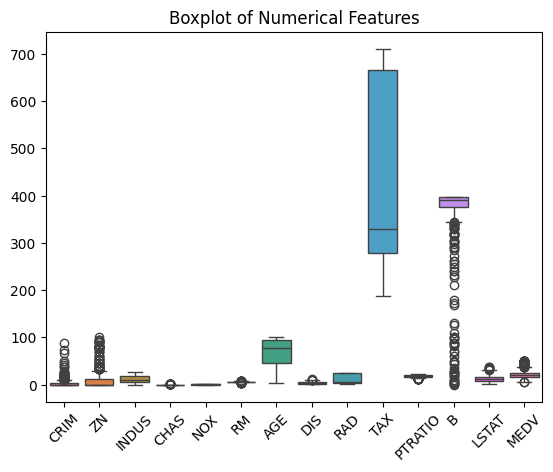

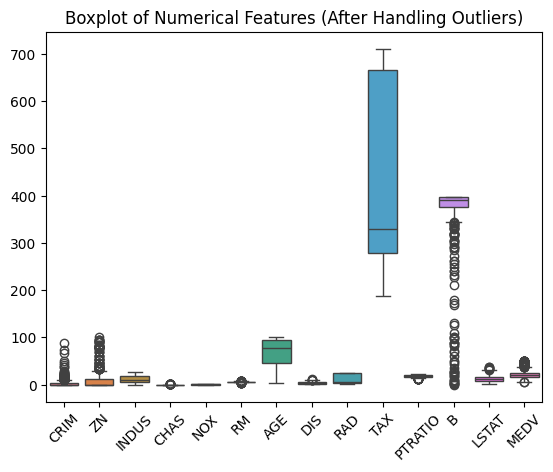

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "boston.csv"
df = pd.read_csv(url)

# Select numerical features (you can adjust this based on your dataset)
numerical_features = df.select_dtypes(include=[np.number])

# Visualize the distribution of numerical features to identify outliers
sns.boxplot(data=numerical_features)
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.show()

# Define a function to handle outliers by trimming
def handle_outliers(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# Apply outlier handling function to numerical features
df = handle_outliers(df, numerical_features.columns)

# Visualize the distribution of numerical features after handling outliers
sns.boxplot(data=numerical_features)
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features (After Handling Outliers)")
plt.show()
